##Data Preprocessing

In [ ]:
#Import data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
#Import CSV file
df = pd.read_csv('defaultofcreditcardclients.csv')

In [ ]:
#Analyze Dataframe attributes and properties
df.head()
df.columns
df.dtypes

ID                         int64
LIMIT_BAL                  int64
SEX                        int64
EDUCATION                  int64
MARRIAGE                   int64
AGE                        int64
PAY_0                      int64
PAY_2                      int64
PAY_3                      int64
PAY_4                      int64
PAY_5                      int64
PAY_6                      int64
BILL_AMT1                  int64
BILL_AMT2                  int64
BILL_AMT3                  int64
BILL_AMT4                  int64
BILL_AMT5                  int64
BILL_AMT6                  int64
PAY_AMT1                   int64
PAY_AMT2                   int64
PAY_AMT3                   int64
PAY_AMT4                   int64
PAY_AMT5                   int64
PAY_AMT6                   int64
DefaultPaymentNextMonth    int64
dtype: object

In [ ]:
#Check data for complete values
df.count()
df.isna().sum()
df.shape

(30000, 25)

In [ ]:
#Drop ID column as it's useless for us
df = df.drop(['ID'], axis = 1)

In [ ]:
#Summary Statistics for Columns
(df.iloc[:, 0:6]).describe()
(df.iloc[:, 6:12]).describe()
(df.iloc[:, 12:18]).describe()
(df.iloc[:, 18:24]).describe()

,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DefaultPaymentNextMonth
count,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
#Check for inconsistent values in Columns with Value_counts and Graphs
df.SEX.value_counts()
df.EDUCATION.value_counts() #Incorrect Labels / Undocumented
df.MARRIAGE.value_counts() #Incorrect Label 0
df.AGE.value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [ ]:
#Remove Outliers Bill Amount < -50000 
bill = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for x in bill:
    df.drop(df[df[x] < -50000].index, inplace = True)

In [ ]:
#Graph Personal Information Columns 
cat = ['SEX', 'EDUCATION', 'MARRIAGE']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


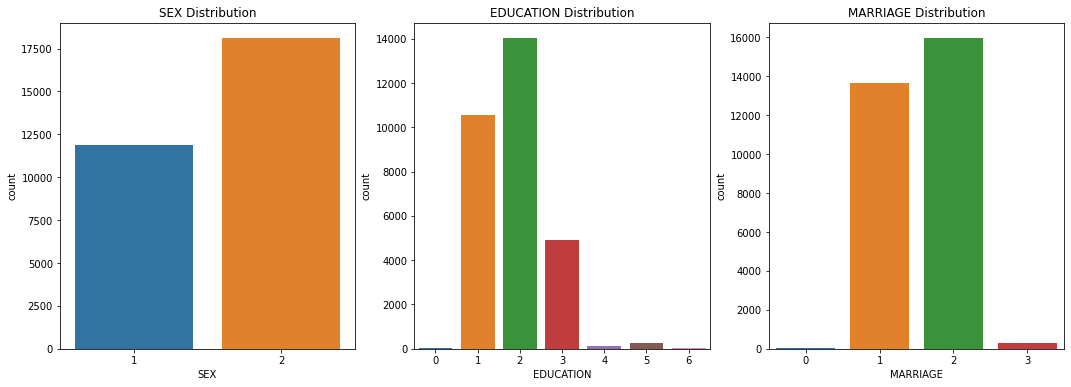

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
for i, x in enumerate(cat):
    sns.countplot(df[x], ax = ax[i])
    ax[i].set_title(x + ' Distribution')
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


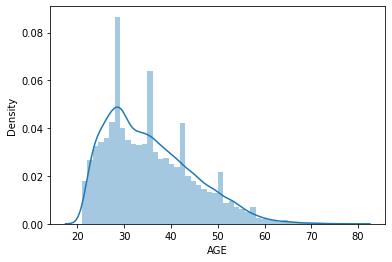

In [ ]:
#Graph Age Column
sns.distplot(df.AGE)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

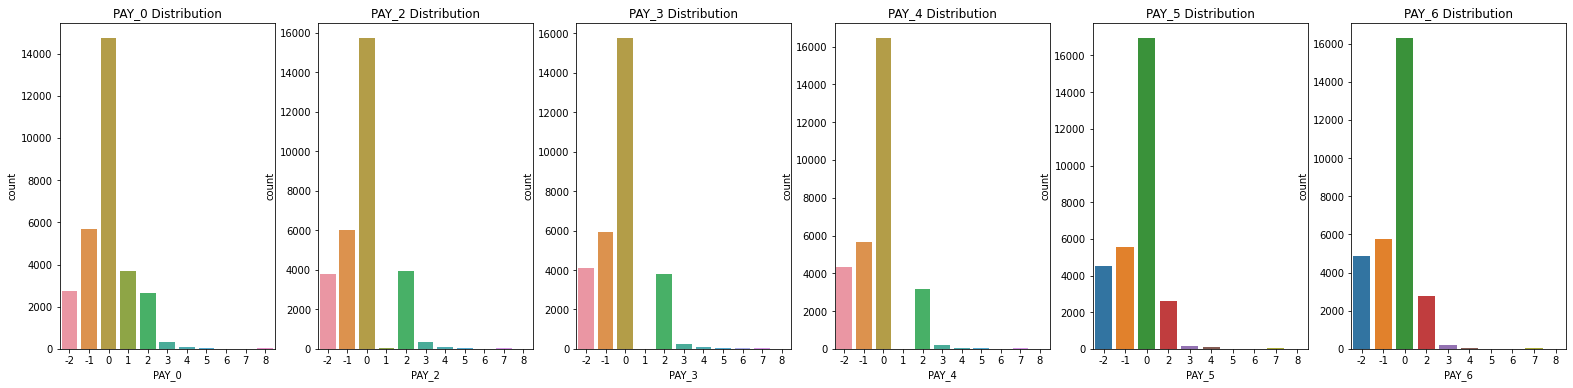

In [ ]:
#Graph Received Payment Columns
pay = ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

fig, ax = plt.subplots(1, 6,figsize=(27,6))

for i, x in enumerate(pay):
    sns.countplot(df[x], ax=ax[i])
    ax[i].set_title(x + ' Distribution')
plt.show()

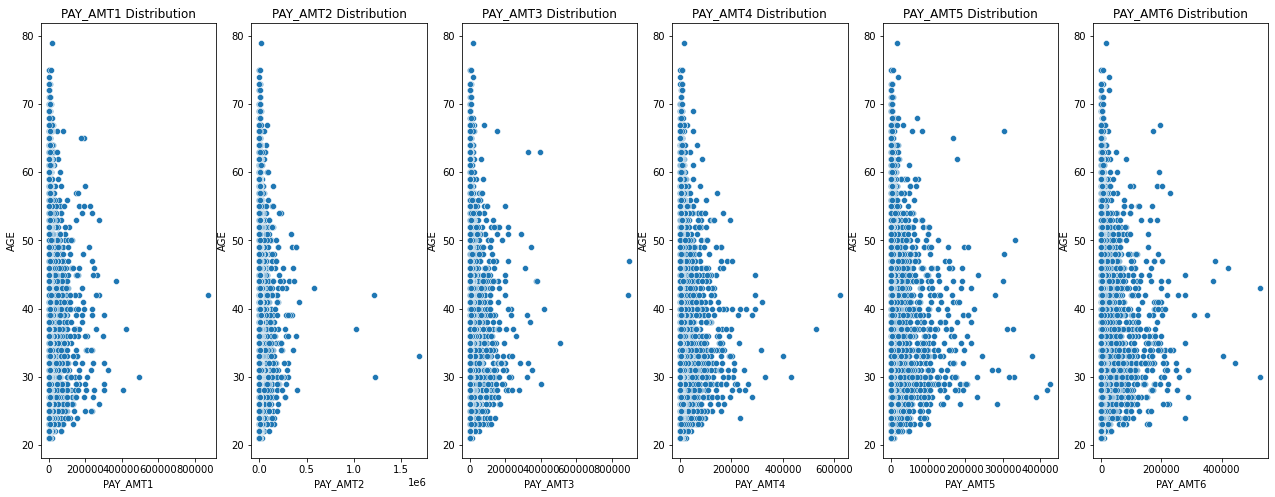

In [ ]:
#Graph Payment Amount vs AGE
pay_am = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]
fig, ax = plt.subplots(1, 6,figsize=(22,8))

for i, x in enumerate(pay_am):
    sns.scatterplot(x=df[x], y = df['AGE'], ax=ax[i])
    ax[i].set_title(x + ' Distribution')
plt.show()

In [ ]:
#Data Imputation

#Education Column
df.loc[(df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0), 'EDUCATION'] =4
df.EDUCATION.value_counts()

2    14023
1    10574
3     4916
4      468
Name: EDUCATION, dtype: int64

In [ ]:
#Marriage Column
df.MARRIAGE.value_counts()
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

In [ ]:
#Rename Columns for clarity
df = df.rename(columns={'DefaultPaymentNextMonth': 'def_pay',
                        'PAY_0': 'PAY_1'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#Payment Status - All negative number as 0
pay = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for x in pay:
     df.loc[df[x] <= 0, x] = 0

df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [ ]:
#Slice dataframe for normalization
data = df.iloc[:, 1:11]
data.head()

data2 = df.loc[:, ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
data2[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29981.000000,29981.000000,2.998100e+04,29981.000000,29981.000000,29981.000000
mean,51240.217004,49185.203562,4.701548e+04,43281.204196,40318.987192,38899.367833
std,73625.823502,71160.479038,6.932292e+04,64318.599819,60786.461906,59467.095367
min,-15308.000000,-33350.000000,-3.404100e+04,-46627.000000,-46627.000000,-46627.000000
25%,3565.000000,2986.000000,2.676000e+03,2332.000000,1770.000000,1260.000000
50%,22384.000000,21212.000000,2.008900e+04,19057.000000,18108.000000,17077.000000
75%,67090.000000,64013.000000,6.015900e+04,54503.000000,50207.000000,49171.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [ ]:
#Scale Age and Payment amounts with StandardScaler
scale = StandardScaler()
scaled = scale.fit_transform(data2.values)

In [ ]:
#Convert numpy array back to Dataframe
data2scaled = pd.DataFrame(scaled, index = data2.index, columns = data2.columns)
data2scaled

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136426,-0.642818,-0.647606,-0.668282,-0.672930,-0.663300,-0.654144,-0.346890,-0.226935,-0.297796,-0.313719,-0.315764,-0.294889
1,-0.365741,-0.659538,-0.666957,-0.639532,-0.622058,-0.606461,-0.599306,-0.346890,-0.213416,-0.240654,-0.248277,-0.315764,-0.180947
2,-0.596947,-0.298830,-0.494077,-0.482626,-0.450114,-0.417386,-0.392667,-0.253450,-0.191682,-0.240654,-0.248277,-0.249777,-0.010033
3,-0.905221,-0.057728,-0.013381,0.032825,-0.232708,-0.186887,-0.157272,-0.223781,-0.169121,-0.229226,-0.241733,-0.245224,-0.237918
4,-0.905221,-0.578926,-0.611518,-0.161284,-0.347358,-0.348323,-0.332431,-0.223781,1.337607,0.273626,0.275263,-0.270299,-0.256206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404943,1.870405,2.018426,2.327545,0.695344,-0.149411,-0.385419,0.176325,0.612498,-0.011914,-0.114316,0.014169,-0.237918
29996,-0.134536,-0.673107,-0.665510,-0.627703,-0.533326,-0.577918,-0.654144,-0.233814,-0.103613,0.216369,-0.305277,-0.315764,-0.294889
29997,-1.059357,-0.647545,-0.644037,-0.638436,-0.348322,-0.324699,-0.328630,-0.346890,-0.256885,0.959333,-0.038861,-0.183790,-0.118278
29998,-0.674015,-0.718309,0.410260,0.422501,0.147593,-0.468270,0.168914,4.940664,-0.108699,-0.230483,-0.187677,3.179153,-0.192113


In [ ]:
#Concatenate Categorical and Scaled Numerical Columns
new_df = pd.concat([data, data2scaled], axis = 1)
new_df['def_pay'] = df['def_pay']
new_df.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')



##EDA

In [ ]:
pd.options.display.float_format = '{:.0f}'.format

In [ ]:
df.shape

(29981, 24)

In [ ]:
#Check data for complete values
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


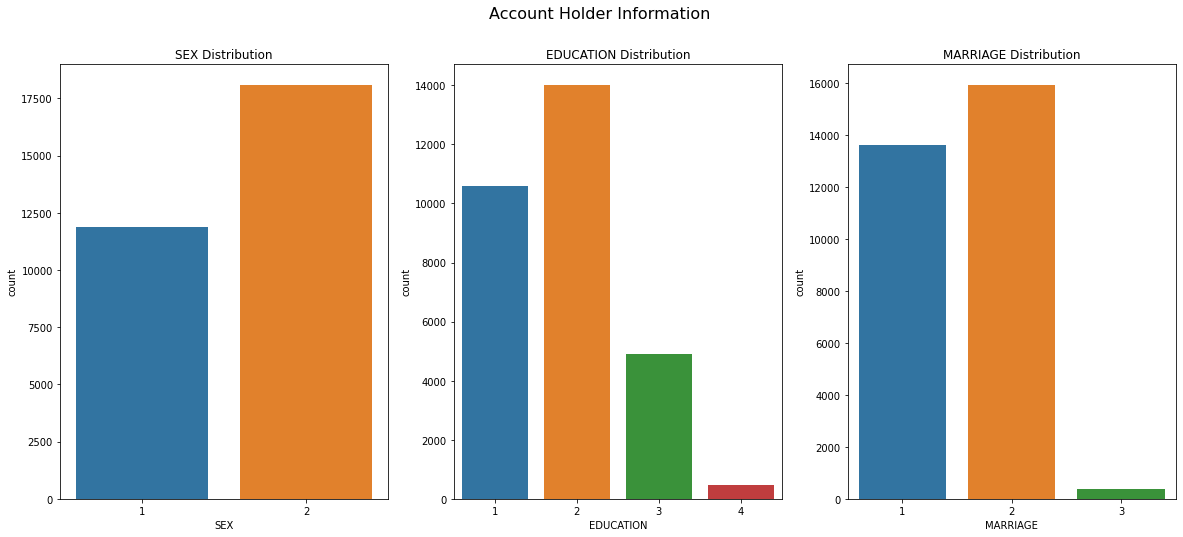

SEX Distribution (1 = Male, 2 = Female)
EDUCATION Distribution (1 = Grad School, 2 = Bachelors, 3 = Highschool, 4 = Other)
MARRIAGE Distribution (1 = Single, 2 = Married, 3 = Other)


In [ ]:
#Graph Personal Information Columns 
cat = ['SEX', 'EDUCATION', 'MARRIAGE']

fig, ax = plt.subplots(1,3, figsize= (20,8))
for i, x in enumerate(cat):
    sns.countplot(df[x], ax = ax[i])
    ax[i].set_title(x + ' Distribution')
    
fig.suptitle("Account Holder Information", fontsize=16)
plt.show()

print(cat[0], 'Distribution (1 = Male, 2 = Female)')
print(cat[1], 'Distribution (1 = Grad School, 2 = Bachelors, 3 = Highschool, 4 = Other)')
print(cat[2], 'Distribution (1 = Single, 2 = Married, 3 = Other)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


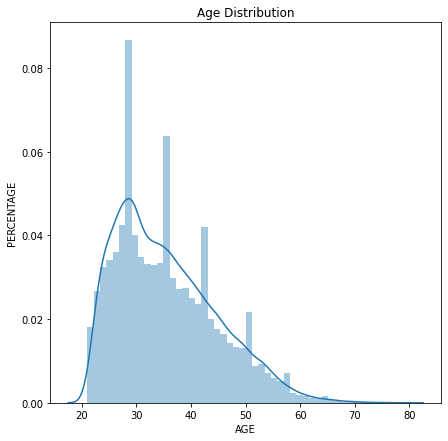

In [ ]:
#Age Distribution

#Graph Age Column
plt.figure(figsize = (7,7))
plt.title('Age Distribution')
sns.distplot(df.AGE)
plt.ylabel('PERCENTAGE')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

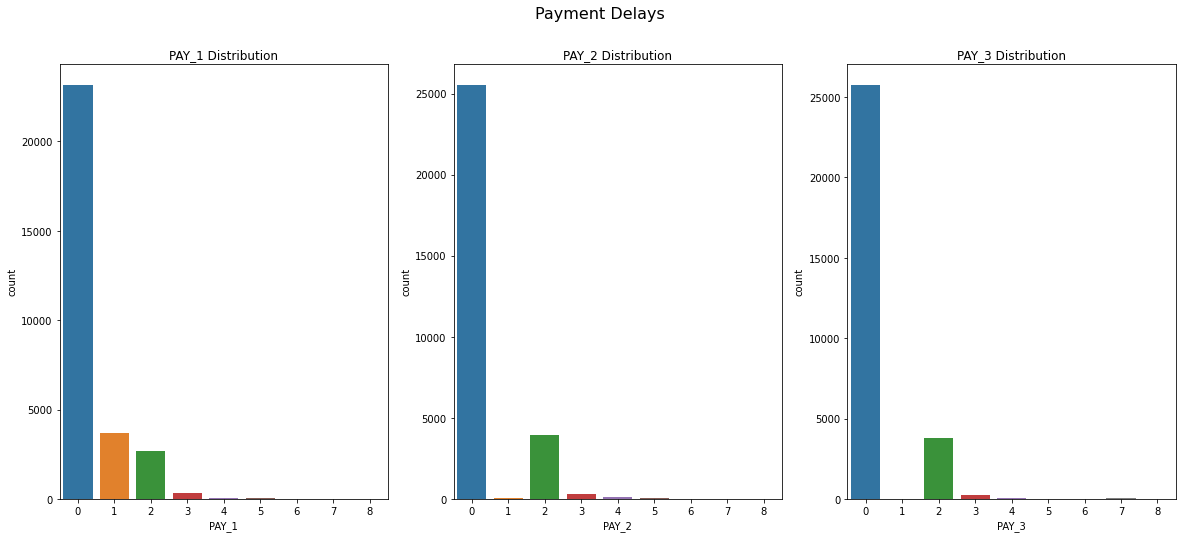

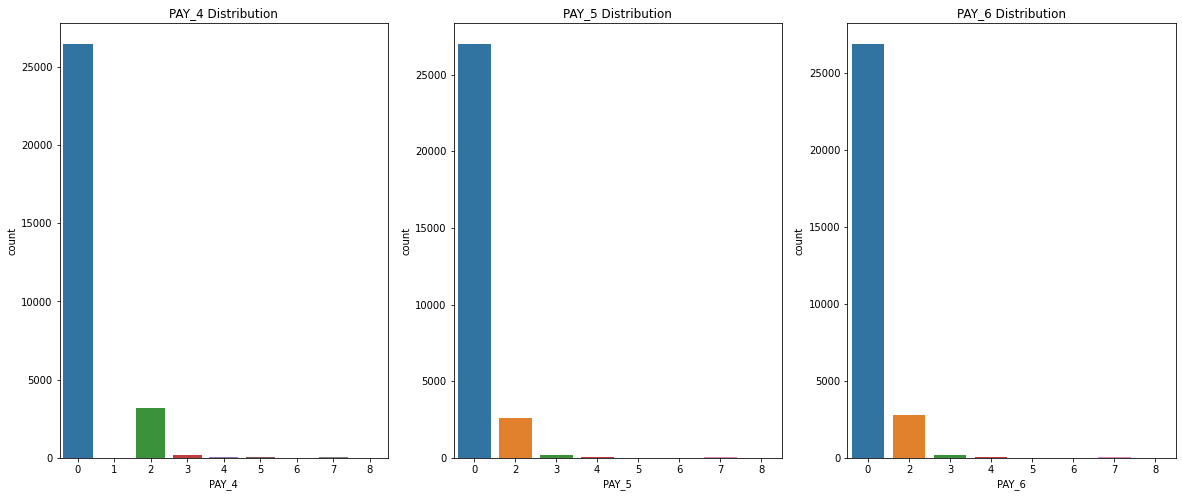

Months of Delay on bill Payment (0 = On Time, 1+ = Delay)


In [ ]:
#Graph Received Payment Columns
pay = ['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

fig, ax = plt.subplots(1, 3,figsize= (20,8))
for i, x in enumerate(pay[:3]):
    sns.countplot(df[x], ax=ax[i])
    ax[i].set_title(x + ' Distribution')
fig.suptitle("Payment Delays", fontsize=16)
    
fig, ax = plt.subplots(1, 3,figsize= (20,8))
for i, x in enumerate(pay[3:]):
    sns.countplot(df[x], ax=ax[i])
    ax[i].set_title(x + ' Distribution')

plt.show()

print('Months of Delay on bill Payment (0 = On Time, 1+ = Delay)')

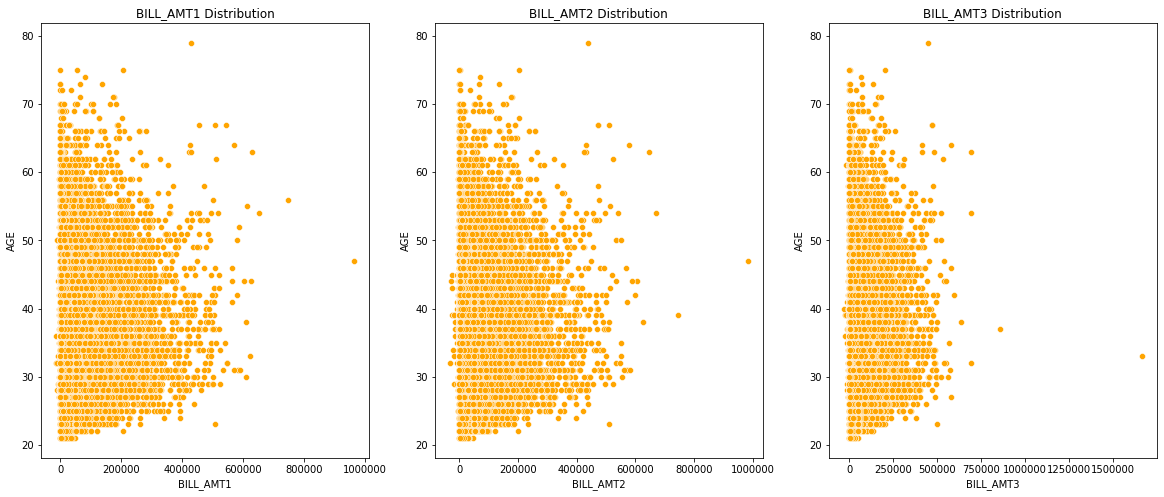

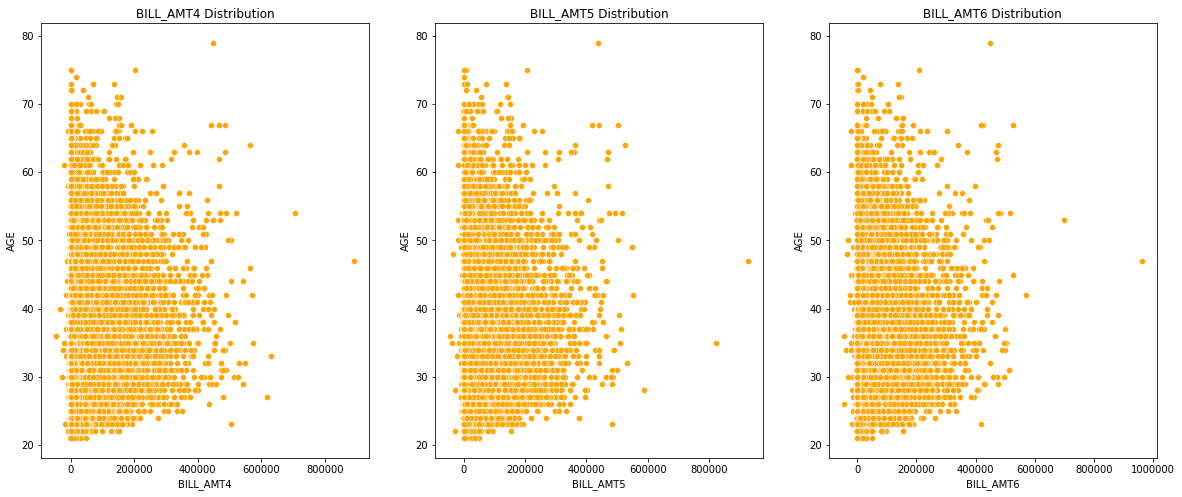

In [ ]:
#Graph Payment Amount vs AGE
pay_am = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
fig, ax = plt.subplots(1, 3, figsize= (20,8))

for a in range(3):
    ax[a].ticklabel_format(useOffset=False, style='plain')

for i, x in enumerate(pay_am[:3]):
    sns.scatterplot(x=df[x], y = df['AGE'], ax=ax[i], color = 'orange')
    ax[i].set_title(x + ' Distribution')

    
fig, ax = plt.subplots(1, 3, figsize= (20,8)) 
for a in range(3):
    ax[a].ticklabel_format(useOffset=False, style='plain')
    
for i, x in enumerate(pay_am[3:6]):
    sns.scatterplot(x=df[x], y = df['AGE'], ax=ax[i], color = 'orange')
    ax[i].set_title(x + ' Distribution') 
    



plt.show()

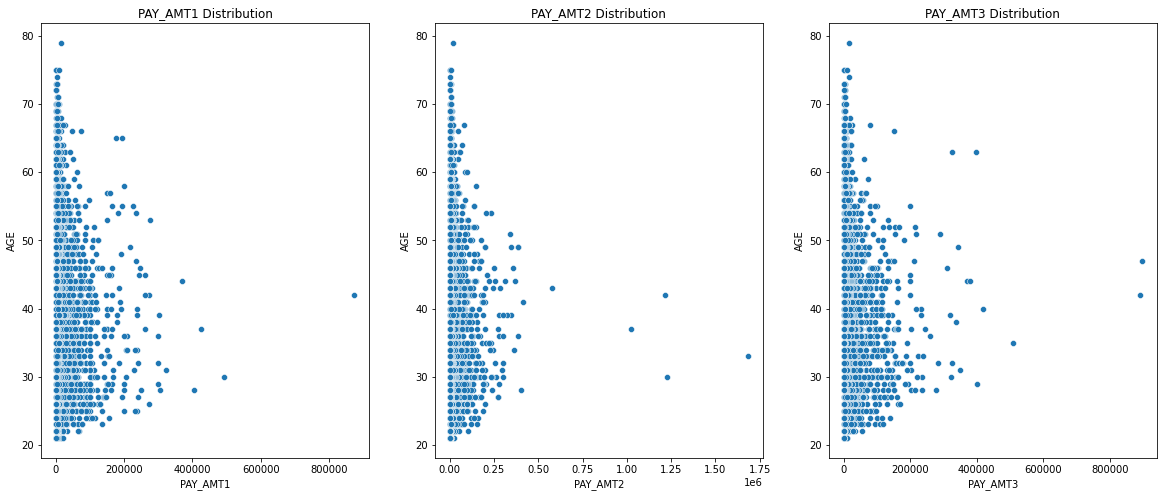

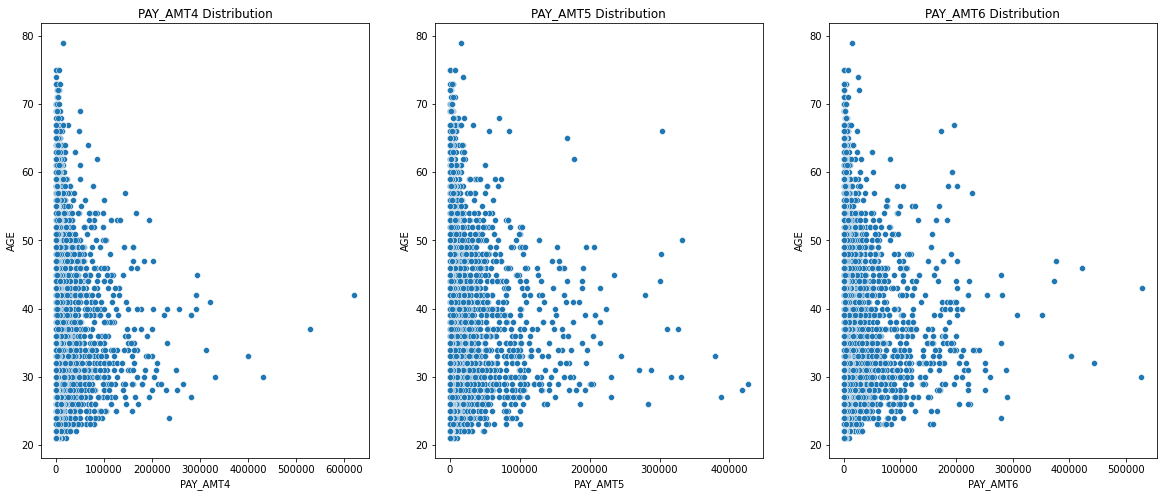

In [ ]:
#Graph Payment Amount vs AGE
pay_am = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]
fig, ax = plt.subplots(1, 3, figsize= (20,8))

for i, x in enumerate(pay_am[:3]):
    sns.scatterplot(x=df[x], y = df['AGE'], ax=ax[i])
    ax[i].set_title(x + ' Distribution')
    
fig, ax = plt.subplots(1, 3, figsize= (20,8))  
for i, x in enumerate(pay_am[3:6]):
    sns.scatterplot(x=df[x], y = df['AGE'], ax=ax[i])
    ax[i].set_title(x + ' Distribution')    

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


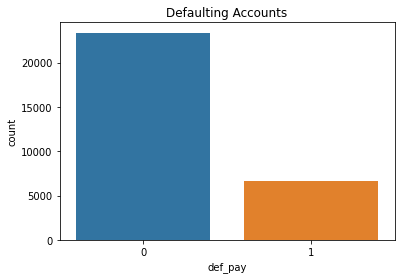

0 is No Default, 1 is Default
22.117340982622327 % defaulted in this data set


In [ ]:
plt.title('Defaulting Accounts')
sns.countplot(df.def_pay)
plt.show()

print('0 is No Default, 1 is Default')
percent = df.def_pay.sum()/df.def_pay.count()
print(percent * 100, '% defaulted in this data set')

##Prediction 

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.utils import resample
import xgboost as xgb

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [ ]:
#Split into X and y
X = df.drop(['def_pay'], axis = 1)
y = df['def_pay']

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X.shape[0] == y.shape[0]

True

In [ ]:
#Resampling to fix Imbalance
#Fix Imbalance
df_train = X_train.join(y_train)
df_train.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
21524,130000,2,3,2,23,2,0,0,0,0,...,19887,11659,11735,5719,10000,5000,2000,2000,2000,1
3451,50000,2,1,2,26,0,0,2,0,0,...,44382,45672,46758,6000,0,2000,2000,2000,2000,0
8488,180000,1,1,2,32,0,0,0,0,0,...,136531,138502,136665,7500,7000,5000,5000,6000,5137,0
3594,500000,2,2,1,42,0,0,0,0,0,...,401635,423136,422271,21000,17414,12000,30000,18000,11000,1
11654,230000,2,1,2,25,0,0,0,0,0,...,55128,52788,53671,3000,2000,2500,2500,2000,2000,0
1096,130000,1,1,2,26,0,0,0,0,0,...,15182,12805,14415,32322,1217,1000,3000,2000,390,0
19655,150000,2,1,2,33,0,0,0,0,0,...,7215,7644,8367,2000,1262,1300,700,1000,950,0
22928,340000,2,2,1,31,0,0,0,0,0,...,137180,135783,135201,7332,5008,6367,4800,4941,4696,0
28741,50000,2,1,2,29,0,0,0,0,0,...,16236,9759,8789,1368,1330,1160,330,314,364,0
14676,100000,1,1,1,45,0,0,0,0,0,...,45598,46752,48008,2200,2100,2000,2000,2010,2006,0


In [ ]:
#Seperate into different classes
df_majority = df_train[df_train.def_pay == 0]
df_minority = df_train[df_train.def_pay == 1]

In [ ]:
print('Default Counts', df_majority.def_pay.count(),'and No Default Counts', df_minority.def_pay.count())

Default Counts 17536 and No Default Counts 4949


In [ ]:
# Upsample minority class
df_minority_upsampled = resample(df_minority,replace=True,  n_samples=df_majority.def_pay.count() ,random_state=587)  
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

We use upsampling to handle and correct for imbalanced data.<br>
In upsampling, we synthetically create new data points and insert them into the dataset. We then have equally balanced data.

In [ ]:
X_train = df_upsampled.drop(['def_pay'], axis = 1)
y_train = df_upsampled['def_pay']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


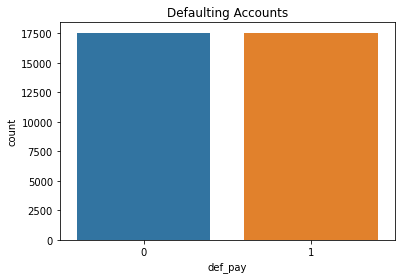

0 is No Default, 1 is Default
22.117340982622327 % defaulted in this data set


In [ ]:
#Check Data Balance
plt.title('Defaulting Accounts')
sns.countplot(df_upsampled.def_pay)
plt.show()

print('0 is No Default, 1 is Default')
percent = df.def_pay.sum()/df.def_pay.count()
print(percent * 100, '% defaulted in this data set')

e) In this model variable DefaultPaymentNextMonth will be used as dependent variable. Investigate statistically and visually this variable and suggest an appropriate method to deal with problem.

In [ ]:
#credit_df.describe().transpose()

##Machine Learning

i) Use a machine learning technique as alternative and compare the result with deep learning model

In [ ]:
#Logistic Regression
logistic = LogisticRegression(max_iter= 10000)
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precision_score(y_test,y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)
print("Logistic Regression Accuracy: {:.2f}".format(acc))

Logistic Regression Accuracy: 0.56


Logistic Regression Accuracy: 0.56

In [ ]:
#Decision Tree Classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.4981185324553151

0.4981185324553151

In [ ]:
#Random Forest Classifier
rf = RandomForestClassifier(random_state = 99)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)
print("Random Forest Test data accuracy: {:.5f}".format(acc))

Random Forest Test data accuracy: 0.81403


Random Forest Test data accuracy: 0.81403

In [ ]:
#xgboost
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)
acc

0.7653415154749199

0.7653415154749199

In [ ]:
#Hyper Parameter Tuning
#Random Forest
rf = RandomForestClassifier()
rf_grid = {"n_estimators": [100, 200, 400, 600], "max_depth": [10, 20, 30, 40, 50], "max_features": ['auto', 'sqrt'], 'criterion':['gini', 'entropy'], 'min_samples_split': [2, 5, 10]}
#Xgboost Classifier
xgboost = xgb.XGBClassifier(eval_metric = 'error')
xgb_grid = {'learning_rate': [0.01,0.03, 0.05], 'max_depth': [8, 10, 20, 30], 'n_estimators': [200, 400, 600, 800]}
xgb_search = RandomizedSearchCV(xgboost, xgb_grid, random_state= 99, scoring = 'accuracy', n_iter = 100, n_jobs = -1, verbose = 1) #Might want to change this to gridsearchcv
xgb_search.fit(X_train, y_train)
xgb_search.best_params_
#print(xgb_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
print(xgb_search.best_params_)

In [ ]:
#Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 400, max_features = 'sqrt', max_depth= 50, criterion = 'gini', min_samples_split = 2, random_state=99)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)
print("Random Forest Test data accuracy: {:.5f}".format(acc))

KeyboardInterrupt: ignored

Random Forest Test data accuracy: 0.81443

In [ ]:
#xgboost
xgboost = xgb.XGBClassifier(n_estimators=600, max_depth=20, learning_rate=0.05, eval_metric= 'error', random_state=99)
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)
print("XGB Classifier Test data accuracy: {:.5f}".format(acc))

XGB Classifier is the best performing ML model

##Deep Learning

f) Apply a Deep learning model to determine which variables have influence to predict the probability of default. Explain the results as well as goodness of fit criteria.

In [ ]:
#Deep Learning
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
#Model Architecture
model = Sequential()
#First hidden layer
model.add(Dense(11, input_dim = X_train.shape[1], activation = 'linear')) #need to change input_shape
model.add(Dense(10,activation='linear'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid',kernel_initializer='normal'))

In [ ]:
opt = Adam(learning_rate=1e-3)

model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])

earlystop = EarlyStopping(patience=30, restore_best_weights= True)

In [ ]:
X_train_arr = np.array(X_train)
X_test_arr = np.array(X_test)
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

In [ ]:
history = model.fit(X_train_arr,
                    y_train_arr.astype(int),
                    validation_data=(X_test_arr, y_test_arr),
                    epochs=100,
                    batch_size=16,
                    callbacks= [earlystop],
                    verbose=1)

Epoch 1/100
2192/2192 [==============================] - 6s 2ms/step - loss: 57.0478 - accuracy: 0.5314 - val_loss: 4.9452 - val_accuracy: 0.6972
Epoch 2/100
2192/2192 [==============================] - 4s 2ms/step - loss: 22.7648 - accuracy: 0.5355 - val_loss: 7.4814 - val_accuracy: 0.6357
Epoch 3/100
2192/2192 [==============================] - 4s 2ms/step - loss: 14.6858 - accuracy: 0.5390 - val_loss: 8.8915 - val_accuracy: 0.7699
Epoch 4/100
2192/2192 [==============================] - 5s 2ms/step - loss: 6.5126 - accuracy: 0.5426 - val_loss: 6.2555 - val_accuracy: 0.3913
Epoch 5/100
2192/2192 [==============================] - 4s 2ms/step - loss: 3.9970 - accuracy: 0.5463 - val_loss: 16.1771 - val_accuracy: 0.4408
Epoch 6/100
2192/2192 [==============================] - 5s 2ms/step - loss: 2.2326 - accuracy: 0.5589 - val_loss: 1.3695 - val_accuracy: 0.6063
Epoch 7/100
2192/2192 [==============================] - 5s 2ms/step - loss: 1.6650 - accuracy: 0.5643 - val_loss: 1.1922 - va

In [ ]:
#Model Evaluation
Mean_loss = np.mean(history.history['loss'])
print("\n%s: %.2f%%" % ('Mean_loss', Mean_loss*100))
Mean_val_loss= np.mean(history.history['val_loss'])
print("\n%s: %.2f%%" % ('Mean_val_loss', Mean_val_loss*100))

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

NameError: ignored

In [ ]:
y_predict_N = model.predict(X_test)

h) Report the confusion matrix and ROC plot.

https://github.com/shinejeanG31/Default-of-Credit-Card-Clients-Prediction/blob/main/Default_of_credit_card_clients.ipynb

In [ ]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_N)
roc_auc = roc_auc_score(y_test, y_predict_N)
print("Classification Report :- \n",classification_report(y_test, y_predict_N))
print('ROC AUC: {}'.format(roc_auc))
print('Confusion Matrix:\n{}'.format(cm))

In [ ]:
#Pot ROC to find the optimal threshold value

y_pb=nn.predict_proba(X_test)
y_0_nn=list(y_pb[:,1]) 
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_0_nn) 
auc=roc_auc_score(y_test,y_0_nn) 

plt.figure()
plt.plot(fpr,tpr)
plt.title('$ROC curve$')
plt.show()
KS_max=0
best_thr=0

for i in range(len(fpr)):
    if(i==0):
        KS_max=tpr[i]-fpr[i]
        best_thr=thresholds[i]
    elif (tpr[i]-fpr[i]>KS_max):
        KS_max= tpr[i] -fpr[i]
        best_thr=thresholds[i]
        
print('Optimal threshold：',best_thr)

NameError: ignored

g) Find optimum parameter of Deep learning model with using grid search

In [ ]:
# create model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=16, verbose=1,optimizer='Adam')

# define the grid search parameters
layers = [(10,), (20,),(30,)]
param_grid = dict(dense_layer_sizes=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train_arr, y_train_arr)

NameError: ignored

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: ignored

j) From the perspective of risk control, estimating the probability of default is more meaningful than classifying clients into binary results. How we can estimate the probability of defaults.

In [ ]:
# A general idea of the default probability over the entire dataframe
df.def_pay.sum() / len(df.def_pay)